In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:


class NeuralNetwork:
    def __init__(self, train_x, train_y, learning_rate=1e-8, min_error_threshold=1e-2):
        self.X_train = train_x
        self.Y_train = train_y
        self.weights = np.zeros((self.Y_train.shape[1], self.X_train.shape[1]))
        self.learning_rate = learning_rate
        self.min_error_threshold = min_error_threshold
        self.error = float("inf")

    @staticmethod
    def network(x, weights):
        return [np.dot(x, weight) for weight in weights]

    @staticmethod
    def show(item):
        plt.imshow(item, cmap='Greys')
        plt.show()

    def fit(self):
        i = 0
        for iteration in tqdm(range(len(self.X_train))):
            i += 1
            prediction = self.network(self.X_train[iteration], self.weights)
            error = sum((self.Y_train[iteration] - prediction) ** 2)
            if error < self.min_error_threshold:
                print(f"{i}: {error}")
                return
            if error < self.error:
                self.error = error
            weighted_delta = [np.dot(data, self.X_train[iteration]) for data in prediction - self.Y_train[iteration]]
            self.weights = self.weights - np.array([wd * self.learning_rate for wd in weighted_delta])
        return self.error

    def predict(self, data):
        data = data.reshape(X_train.shape[1])
        return np.array([np.dot(data, weight) for weight in self.weights]).argmax()

    def predict_show(self, data):
        self.show(data)
        print(f"predicted: {self.predict(data)}")
        return np.array([np.dot(data.reshape(X_train.shape[1]), weight) for weight in self.weights])

    def prediction_iter(self, x_test, y_test):
        for i in range(len(x_test)):
            yield 1 if y_test[i] == self.predict(x_test[i].reshape(self.X_train.shape[1])) else 0

In [3]:
train, test = mnist.load_data()

In [4]:
X_train, y_train = train

In [5]:
temp_y = np.zeros((y_train.size, y_train.max() + 1))
temp_y[np.arange(y_train.size), y_train] = 1
y_train = temp_y

In [7]:
X_train = X_train.reshape(-1, 28 * 28)

In [8]:
y_train = np.array(y_train)
X_train = np.array(X_train)

In [9]:
neural_network = NeuralNetwork(X_train, y_train, learning_rate=1e-8, min_error_threshold=1e-3)
neural_network.fit()

100%|██████████| 60000/60000 [00:08<00:00, 7061.86it/s]


0.0029111685569118174

In [10]:
lst = neural_network.prediction_iter(test[0], test[1])
lst = list(lst)
sum(lst) / len(list(lst)) * 100

82.78

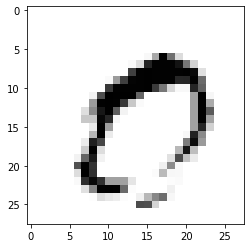

predicted: 0


array([ 0.73237264, -0.00621298, -0.2172218 , -0.02753032, -0.10862353,
        0.0382142 ,  0.00645822,  0.14569402,  0.03104276,  0.31361345])

In [16]:
neural_network.predict_show(test[0][9621])

In [26]:
test[1][2415]

2